# Simple Linear Regression

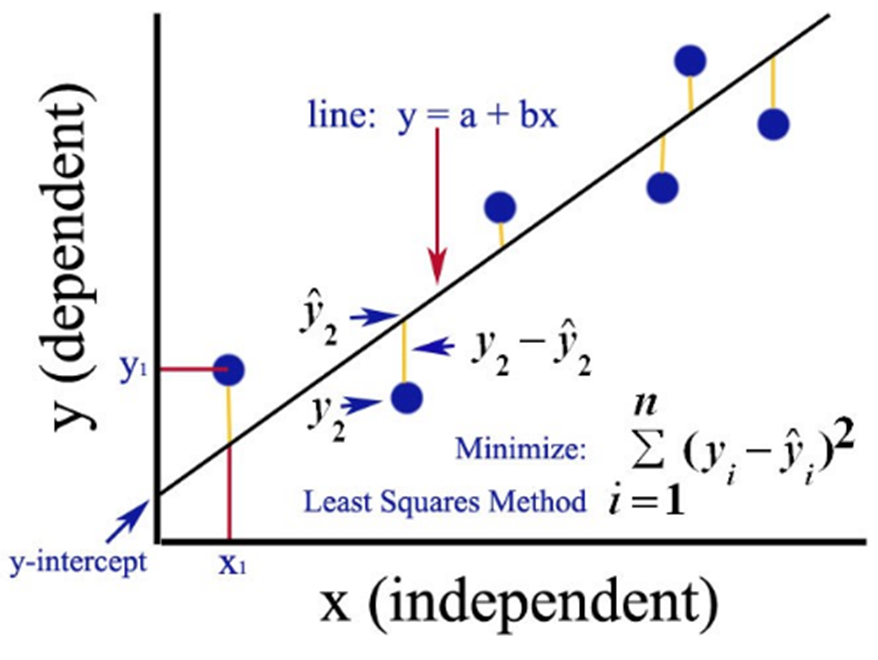

In [1]:
# Ignore non harmful warings
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion 
Reading the file

In [7]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Performing visualizations

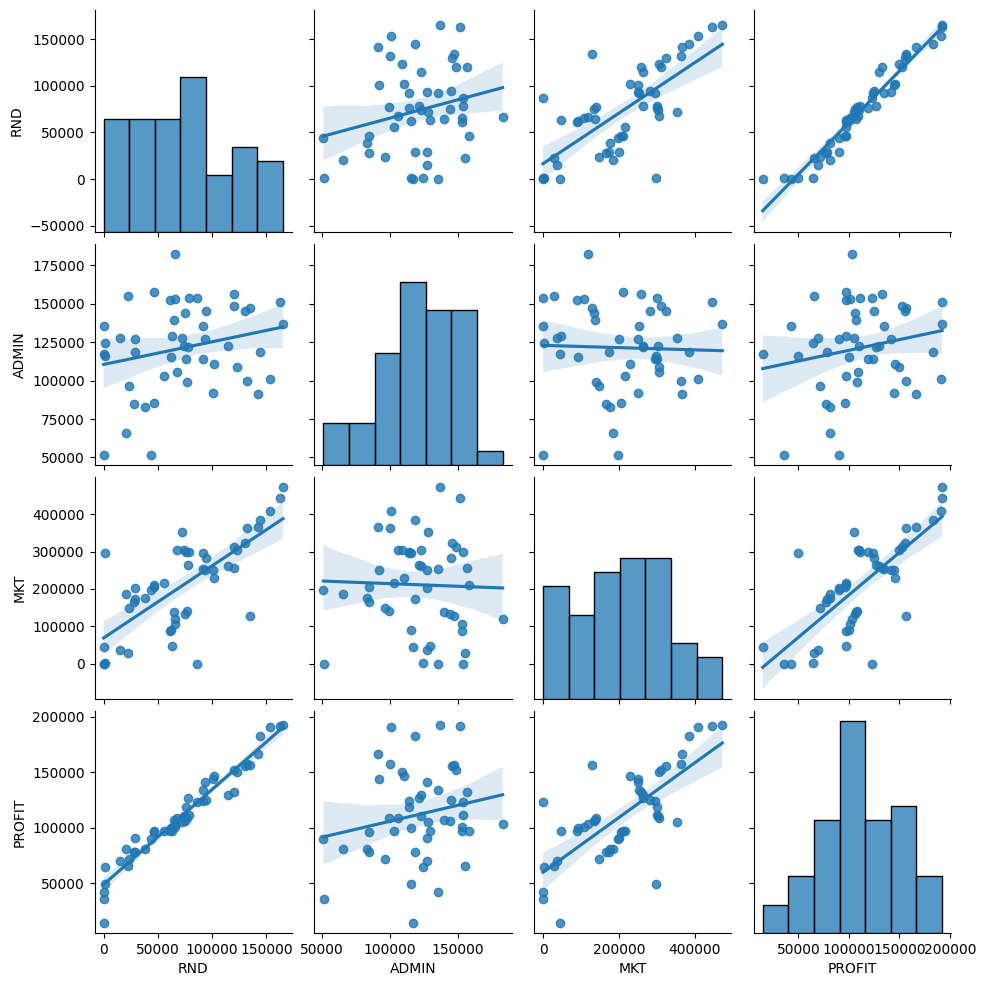

In [11]:
import seaborn as sns
sns.pairplot(df, kind="reg")

In [12]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


### PROFIT ~ RND
### PROFIT = B0 + B1*RND
### Target - Profit, Predictor - RND 

### Step 4 - Seperate X(RND) and Y(PROFIT)

In [13]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [14]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 5 - Apply Machine Learning Model - LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Check slope and intercept values

In [18]:
model.intercept_

array([49032.89914125])

In [19]:
model.coef_

array([[0.85429137]])

In [20]:
type(model.coef_)

numpy.ndarray

### PROFIT_pred = 49032.8 + 0.8543xRND

### If RND increases by 1 unit PROFIT will increase by 0.8543 units on an average
### If RND increase by 1000 unit PROFIT will increase by 854.3 units on an average

### Visulize straight line

In [22]:
import matplotlib.pyplot as plt

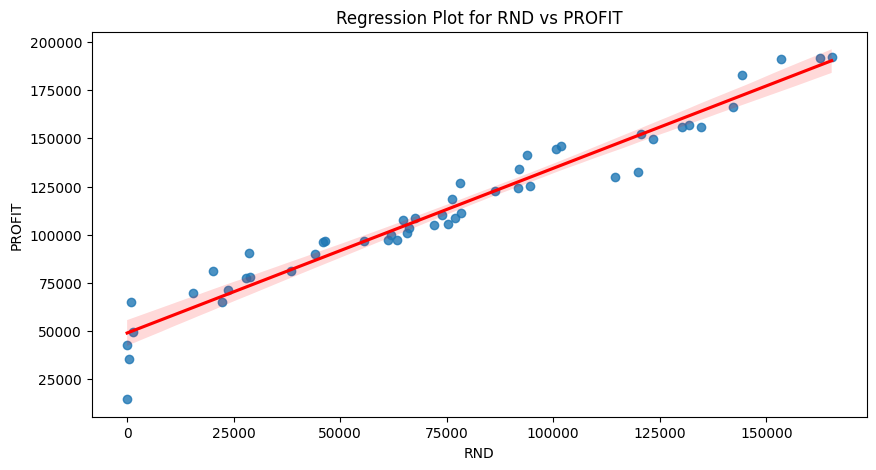

In [24]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})
plt.title("Regression Plot for RND vs PROFIT")
plt.show()

In [25]:
model.score(X, Y)

0.9465353160804393